In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [3]:
season_stats = LeagueDashPlayerStats()

In [5]:
stats_df = season_stats.get_data_frames()[0]

In [11]:
stats_df = stats_df.sort_values(by='PTS', ascending=False)

In [16]:
top_10 = stats_df.iloc[:10]

In [32]:
game_log = PlayerGameLog(player_id=2544)
game_log_df = game_log.get_data_frames()[0]

In [35]:
score_counts = game_log_df.PTS.value_counts()

In [50]:
score_counts.loc[28]

3

In [47]:
game_log_df.loc['PTS_COUNTS'] = game_log_df.ma

ValueError: cannot set a row with mismatched columns

In [14]:
from nba_api.stats.endpoints.playergamelog import PlayerGameLog

In [53]:
def points_each_game_for_player_and_counts(player_id):
    game_log = PlayerGameLog(player_id=player_id)
    game_log_df = game_log.get_data_frames()[0]
    score_counts = game_log_df.PTS.value_counts()
    counts_for_each = []
    points = game_log_df.PTS.tolist()
    for point in points:
        counts_for_each.append(score_counts.loc[point])
    return points, counts_for_each

In [73]:
player_name_pts_dict = dict()
for (player_id, player_name) in zip(top_10.PLAYER_ID.tolist(), top_10.PLAYER_NAME.tolist()):
    player_name_pts_dict[player_name] = points_each_game_for_player_and_counts(player_id)
    print(player_name)

Kevin Durant
LeBron James
Damian Lillard
Joel Embiid
James Harden
Kemba Walker
DeMar DeRozan
Anthony Davis
Zach LaVine
Giannis Antetokounmpo


In [ ]:
plt.style.use('fivethirtyeight')

In [62]:
print(plt.rcParams['lines.markersize'])

6.0


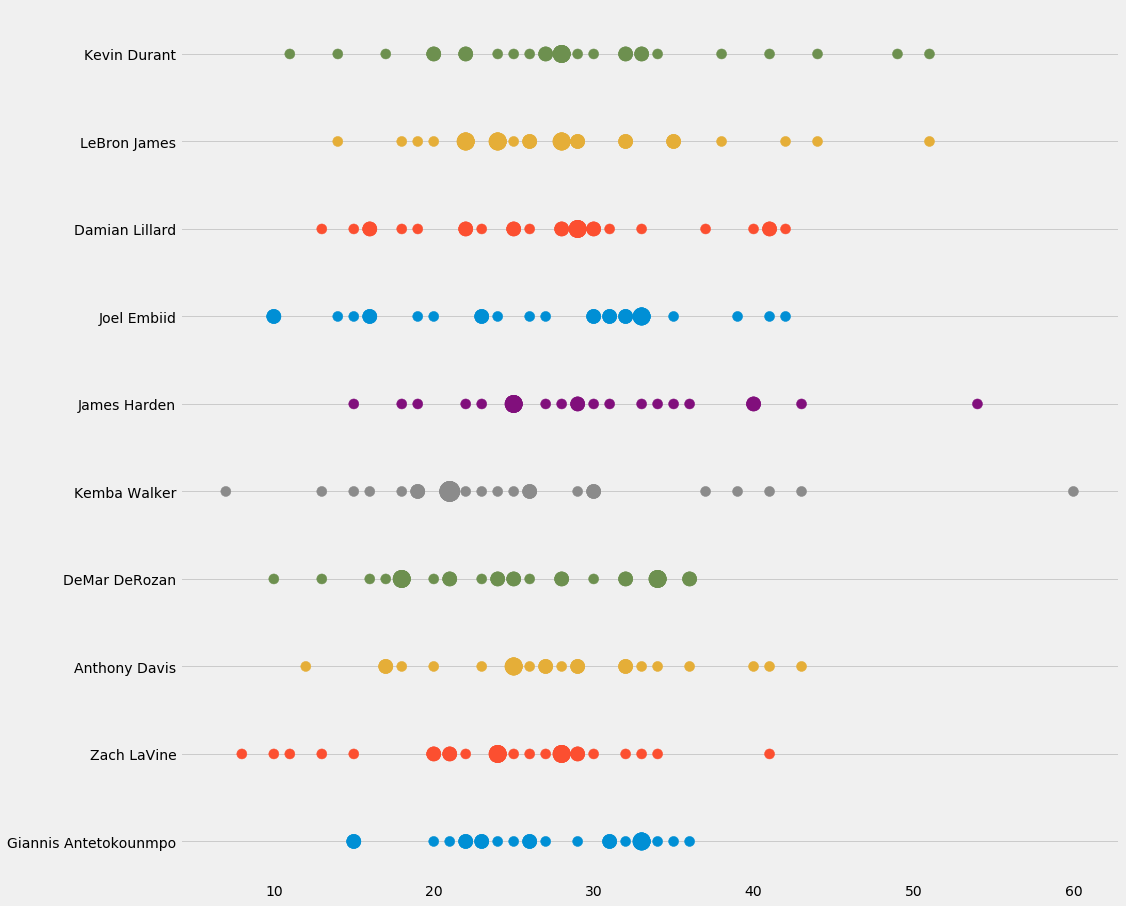

In [96]:
plt.figure(figsize=(15, 15))
for player_name in reversed(list(player_name_pts_dict.keys())):
    points_list, scores_list = player_name_pts_dict[player_name]
    scores_list = np.array(scores_list)
    plt.scatter(x=points_list, y=[player_name] * len(points_list), s=scores_list * 10 ** 2)
plt.grid(False, which='major', axis='x')
# plt.gca().tick_params(bottom=True)